# Usage (details: policy measures)
Here, we will analyse the relationship of policy measures and parameter values of SIR-derived ODE models. Policy measures are tracked by [Oxford Covid-19 Government Response Tracker (OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker).

## Preparation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
from pprint import pprint

In [3]:
import covsirphy as cs
cs.__version__

'2.7.0'

In [4]:
# Standard users and developers
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=False)
# Population in each country
population_data = data_loader.population(verbose=False)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=False)
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Working paper, doi: 10.13140/RG.2.2.11649.81763.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

## Class for policy measure analysis
We will `PolicyMeasures` class to find relationship of policy measures and parameter values of SIR-derived ODE models.

In [5]:
# Create analyser with tau value 360 [min] (can be changed)
analyser = cs.PolicyMeasures(jhu_data, population_data, oxcgrt_data, tau=360)
# The number of registerd countries
len(analyser.countries)

184

In [6]:
# We can get Scenario instance for detailed scenario analysis
type(analyser.scenario("Japan"))

covsirphy.analysis.scenario.Scenario

## Set phases with S-R trend analysis
We will perform S-R trend analysis to set phases in all countries. Countries which do not have **9th phases** will be un-registered for the next analysis. This number will be adjusted for your analysis.

In [7]:
# Show the number of phases of all countries
analyser.trend()
pprint(analyser.phase_len(), compact=True)

{

2

: 

['Papua New Guinea', 'Bahamas', 'Gambia']

,
 

3

: 

[

'Mauritius'

, 

'Antigua and Barbuda'

, 

'Tanzania'

, 

'Peru'

, 

'Brunei'

,
     

'Montenegro'

, 

'Seychelles'

, 

'Lesotho'

, 

'Grenada'

]

,
 

4

: 

[

'Guyana'

, 

'Norway'

, 

'Paraguay'

, 

'Zambia'

, 

'Palestine'

, 

'Suriname'

,
     

'Zimbabwe'

, 

'Saint Vincent and the Grenadines'

, 

'Saint Lucia'

, 

'Benin'

,
     

'Malawi'

, 

'Sao Tome and Principe'

, 

'Iceland'

, 

'Madagascar'

, 

'Venezuela'

,
     

'Guatemala'

, 

'South Sudan'

, 

'Ethiopia'

, 

'Central African Republic'

,
     

'Liechtenstein'

, 

'Botswana'

, 

'New Zealand'

, 

'Eritrea'

, 

'Kyrgyzstan'

,
     

'Belize'

]

,
 

5

: 

[

'Haiti'

, 

'Malta'

, 

'Slovenia'

, 

'Bosnia and Herzegovina'

, 

'Slovakia'

,
     

'Andorra'

, 

'Equatorial Guinea'

, 

'Cambodia'

, 

'Philippines'

, 

'Nicaragua'

,
     

'Kosovo'

, 

'Bermuda'

, 

'Bolivia'

, 

'Japan'

, 

'Syria'

, 

'Angola'

, 

'Netherlands'

,
     

'Colombia'

, 

'Ireland'

, 

'Argentina'

, 

'Comoros'

, 

'Niger'

, 

'Croatia'

, 

'Kenya'

,
     

'Morocco'

, 

'Guinea-Bissau'

, 

'Lebanon'

, 

'Libya'

, 

'Swaziland'

, 

'Costa Rica'

,
     

'Chad'

]

,
 

6

: 

[

'Togo'

, 

'Congo'

, 

'Sudan'

, 

'Uganda'

, 

'Australia'

, 

'Azerbaijan'

, 

'Sri Lanka'

,
     

'Mongolia'

, 

'Latvia'

, 

'Somalia'

, 

'Honduras'

, 

'Iraq'

, 

'Yemen'

,
     

'Switzerland'

, 

'Oman'

, 

'Albania'

, 

'India'

, 

'Cape Verde'

, 

'Barbados'

,
     

'Cameroon'

, 

'Germany'

, 

'Cyprus'

, 

'Burundi'

, 

'El Salvador'

, 

'Mauritania'

,
     

'Macedonia'

, 

'Afghanistan'

, 

'San Marino'

, 

'Israel'

, 

'Panama'

, 

'Bulgaria'

,
     

'Thailand'

, 

'Rwanda'

, 

'Spain'

, 

'Kazakhstan'

, 

'Trinidad and Tobago'

,
     

'Ecuador'

, 

'Taiwan'

, 

'Uzbekistan'

, 

'South Africa'

, 

'Tajikistan'

]

,
 

7

: 

[

'Liberia'

, 

'Nepal'

, 

'Monaco'

, 

'Greece'

, 

'Armenia'

, 

'Brazil'

,
     

'Sierra Leone'

, 

'Serbia'

, 

'Egypt'

, 

'Bangladesh'

, 

'Belarus'

, 

'Jordan'

,
     

'Djibouti'

, 

'Indonesia'

, 

'Ghana'

, 

'Lithuania'

, 

'Gabon'

, 

'Luxembourg'

,
     

'Pakistan'

, 

'Belgium'

, 

'Finland'

, 

'Mozambique'

, 

'China'

, 

'Algeria'

,
     

'Estonia'

, 

'Tunisia'

, 

'Bhutan'

, 

'Maldives'

, 

'Myanmar'

, 

'Burkina Faso'

,
     

'Qatar'

, 

'Mali'

, 

'Dominican Republic'

, 

'Mexico'

, 

'Cuba'

]

,
 

8

: 

[

'Denmark'

, 

'Romania'

, 

'Turkey'

, 

'Uruguay'

, 

'Russia'

, 

'Saudi Arabia'

,
     

'Singapore'

, 

'Korea, South'

, 

'Vietnam'

, 

'Chile'

, 

'France'

, 

'Nigeria'

,
     

'United States'

, 

'Georgia'

, 

'Hungary'

, 

'Jamaica'

, 

'Malaysia'

]

,
 

9

: 

[

'Czech Republic'

, 

'Ukraine'

, 

'Canada'

, 

'Italy'

, 

'Moldova'

, 

'Portugal'

,
     

'Austria'

, 

'United Arab Emirates'

, 

'Poland'

, 

'Kuwait'

]

,
 

10

: 

['Senegal', 'Bahrain', 'Iran', 'Guinea']

}

In [8]:
# Set phases with S-R trend analysis
analyser.trend(min_len=9)
# The number of countries
len(analyser.countries)

14

In [9]:
phase_len_dict = analyser.phase_len()
pprint(phase_len_dict, compact=True)

{

9

: 

[

'Czech Republic'

, 

'Ukraine'

, 

'Canada'

, 

'Italy'

, 

'Moldova'

, 

'Portugal'

,
     

'Austria'

, 

'United Arab Emirates'

, 

'Poland'

, 

'Kuwait'

]

,
 

10

: 

['Senegal', 'Bahrain', 'Iran', 'Guinea']

}

In [10]:
# Here, only show the countries which have the most phases
countries_show = max(phase_len_dict.items(), key=lambda x: x[0])[1]
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population
Country Phase                                        
Senegal 1st    Past  30Apr2020  14May2020    15854360
        2nd    Past  15May2020  29May2020    15854360
        3rd    Past  30May2020  09Jun2020    15854360
        4th    Past  10Jun2020  19Jun2020    15854360
        5th    Past  20Jun2020  30Jun2020    15854360
        6th    Past  01Jul2020  10Jul2020    15854360
        7th    Past  11Jul2020  20Jul2020    15854360
        8th    Past  21Jul2020  28Jul2020    15854360
        9th    Past  29Jul2020  06Aug2020    15854360
        10th   Past  07Aug2020  16Aug2020    15854360
Bahrain 1st    Past  06May2020  25May2020     1569439
        2nd    Past  26May2020  04Jun2020     1569439
        3rd    Past  05Jun2020  13Jun2020     1569439
        4th    Past  14Jun2020  21Jun2020     1569439
        5th    Past  22Jun2020  29Jun2020     1569439
        6th    Past  30Jun2020  07Jul2020     1569439
        7th    Past  08Jul2020  15Jul2020     1569439
        8th    Past  16Jul2020  25Jul2020     1569439
        9th    Past  26Jul2020  04Aug2020     1569439
        10th   Past  05Aug2020  16Aug2020     1569439
Iran    1st    Past  28Mar2020  12Apr2020    81800269
        2nd    Past  13Apr2020  04May2020    81800269
        3rd    Past  05May2020  20May2020    81800269
        4th    Past  21May2020  02Jun2020    81800269
        5th    Past  03Jun2020  15Jun2020    81800269
        6th    Past  16Jun2020  27Jun2020    81800269
        7th    Past  28Jun2020  09Jul2020    81800269
        8th    Past  10Jul2020  21Jul2020    81800269
        9th    Past  22Jul2020  02Aug2020    81800269
        10th   Past  03Aug2020  16Aug2020    81800269
Guinea  1st    Past  02May2020  11May2020    12414318
        2nd    Past  12May2020  19May2020    12414318
        3rd    Past  20May2020  28May2020    12414318
        4th    Past  29May2020  08Jun2020    12414318
        5th    Past  09Jun2020  17Jun2020    12414318
        6th    Past  18Jun2020  02Jul2020    12414318
        7th    Past  03Jul2020  14Jul2020    12414318
        8th    Past  15Jul2020  23Jul2020    12414318
        9th    Past  24Jul2020  03Aug2020    12414318
        10th   Past  04Aug2020  16Aug2020    12414318

## Parameter estimation
we will estimate the parameter values with SIR-derived ODE models in each country.

In [11]:
# Parameter estimation with SIR-F model
analyser.estimate(cs.SIRF)


<SIR-F model: parameter estimation>

Running optimization with 4 CPUs...

	PRT,  5th phase (17Jun2020 - 25Jun2020): finished  203 trials in 0 min 10 sec

	GIN,  7th phase (03Jul2020 - 14Jul2020): finished 1138 trials in 1 min  0 sec

	CZE,  1st phase (08Apr2020 - 16Apr2020): finished 1151 trials in 1 min  0 sec

	CAN,  9th phase (26Jul2020 - 16Aug2020): finished 1147 trials in 1 min  0 sec

	ITA,  1st phase (24Mar2020 - 31Mar2020): finished  239 trials in 0 min 10 sec

	IRN,  6th phase (16Jun2020 - 27Jun2020): finished 1178 trials in 1 min  0 sec

	AUT,  6th phase (02Jul2020 - 17Jul2020): finished  354 trials in 0 min 15 sec

	KWT,  3rd phase (06Jun2020 - 15Jun2020): finished  668 trials in 0 min 30 sec

	PRT,  6th phase (26Jun2020 - 07Jul2020): finished  237 trials in 0 min 10 sec

	CZE,  9th phase (31Jul2020 - 16Aug2020): finished  555 trials in 0 min 25 sec

	CZE,  8th phase (21Jul2020 - 30Jul2020): finished 1180 trials in 1 min  0 sec

	PRT,  2nd phase (18May2020 - 28May2020): finished 1212 trials in 1 min  0 sec

	ITA,  5th phase (02May2020 - 09May2020): finished  248 trials in 0 min 10 sec

	ARE,  6th phase (23Jun2020 - 02Jul2020): finished 1222 trials in 1 min  0 sec

	SEN,  1st phase (30Apr2020 - 14May2020): finished 1175 trials in 1 min  0 sec

	MDA,  7th phase (20Jul2020 - 29Jul2020): finished  350 trials in 0 min 15 sec

	UKR,  7th phase (17Jul2020 - 24Jul2020): finished  251 trials in 0 min 10 sec

	BHR,  2nd phase (26May2020 - 04Jun2020): finished 1100 trials in 0 min 55 sec

	GIN,  8th phase (15Jul2020 - 23Jul2020): finished 1197 trials in 1 min  0 sec

	KWT,  6th phase (05Jul2020 - 14Jul2020): finished  461 trials in 0 min 20 sec

	ITA,  4th phase (22Apr2020 - 01May2020): finished  440 trials in 0 min 20 sec

	GIN,  9th phase (24Jul2020 - 03Aug2020): finished 1173 trials in 1 min  0 sec

	POL,  2nd phase (09May2020 - 20May2020): finished 1162 trials in 1 min  0 sec

	PRT,  1st phase (05May2020 - 17May2020): finished 1156 trials in 1 min  0 sec

	MDA,  6th phase (09Jul2020 - 19Jul2020): finished  217 trials in 0 min 10 sec

	ITA,  9th phase (07Jul2020 - 16Aug2020): finished  436 trials in 0 min 20 sec

	PRT,  3rd phase (29May2020 - 06Jun2020): finished  440 trials in 0 min 20 sec

	POL,  7th phase (14Jul2020 - 24Jul2020): finished  438 trials in 0 min 20 sec

	BHR,  9th phase (26Jul2020 - 04Aug2020): finished  324 trials in 0 min 15 sec

	UKR,  2nd phase (23May2020 - 08Jun2020): finished 1144 trials in 1 min  0 sec

	POL,  4th phase (05Jun2020 - 16Jun2020): finished  231 trials in 0 min 10 sec

	BHR,  7th phase (08Jul2020 - 15Jul2020): finished 1185 trials in 1 min  0 sec

	POL,  1st phase (23Apr2020 - 08May2020): finished 1159 trials in 1 min  0 sec

	BHR,  5th phase (22Jun2020 - 29Jun2020): finished 1176 trials in 1 min  0 sec

	SEN,  4th phase (10Jun2020 - 19Jun2020): finished 1162 trials in 1 min  0 sec

	GIN,  5th phase (09Jun2020 - 17Jun2020): finished  543 trials in 0 min 25 sec

	BHR,  8th phase (16Jul2020 - 25Jul2020): finished  125 trials in 0 min  5 sec

	GIN,  3rd phase (20May2020 - 28May2020): finished 1181 trials in 1 min  0 sec

	KWT,  1st phase (11May2020 - 23May2020): finished 1142 trials in 1 min  0 sec

	SEN, 10th phase (07Aug2020 - 16Aug2020): finished  544 trials in 0 min 25 sec

	CAN,  4th phase (07May2020 - 15May2020): finished  223 trials in 0 min 10 sec

	IRN,  7th phase (28Jun2020 - 09Jul2020): finished  220 trials in 0 min 10 sec

	SEN,  9th phase (29Jul2020 - 06Aug2020): finished  420 trials in 0 min 20 sec

	ARE,  1st phase (28Apr2020 - 12May2020): finished 1122 trials in 1 min  0 sec

	SEN,  8th phase (21Jul2020 - 28Jul2020): finished 1114 trials in 1 min  0 sec

	UKR,  5th phase (28Jun2020 - 07Jul2020): finished  323 trials in 0 min 15 sec

	UKR,  1st phase (07May2020 - 22May2020): finished 1104 trials in 1 min  0 sec

	BHR,  1st phase (06May2020 - 25May2020): finished 1113 trials in 1 min  0 sec

	CAN,  6th phase (25May2020 - 06Jun2020): finished  248 trials in 0 min 10 sec

	CZE,  4th phase (16May2020 - 06Jun2020): finished  356 trials in 0 min 15 sec

	KWT,  2nd phase (24May2020 - 05Jun2020): finished 1130 trials in 1 min  0 sec

	IRN,  9th phase (22Jul2020 - 02Aug2020): finished  200 trials in 0 min 10 sec

	MDA,  8th phase (30Jul2020 - 06Aug2020): finished  484 trials in 0 min 20 sec

	ARE,  8th phase (11Jul2020 - 25Jul2020): finished 1178 trials in 1 min  0 sec

	MDA,  2nd phase (29May2020 - 09Jun2020): finished 1194 trials in 1 min  0 sec

	ITA,  3rd phase (13Apr2020 - 21Apr2020): finished  307 trials in 0 min 10 sec

	MDA,  4th phase (18Jun2020 - 26Jun2020): finished  663 trials in 0 min 20 sec

	GIN,  2nd phase (12May2020 - 19May2020): finished 1351 trials in 1 min  0 sec

	AUT,  7th phase (18Jul2020 - 28Jul2020): finished  180 trials in 0 min  5 sec

	SEN,  2nd phase (15May2020 - 29May2020): finished 1611 trials in 1 min  0 sec

	AUT,  8th phase (29Jul2020 - 07Aug2020): finished 1624 trials in 1 min  0 sec

	MDA,  3rd phase (10Jun2020 - 17Jun2020): finished  361 trials in 0 min 10 sec

	BHR,  4th phase (14Jun2020 - 21Jun2020): finished 1618 trials in 1 min  0 sec

	KWT,  5th phase (25Jun2020 - 04Jul2020): finished 1625 trials in 1 min  0 sec

	ARE,  5th phase (12Jun2020 - 22Jun2020): finished 1167 trials in 0 min 40 sec

	IRN,  8th phase (10Jul2020 - 21Jul2020): finished  187 trials in 0 min  5 sec

	POL,  3rd phase (21May2020 - 04Jun2020): finished  790 trials in 0 min 25 sec

	PRT,  4th phase (07Jun2020 - 16Jun2020): finished  923 trials in 0 min 30 sec

	SEN,  7th phase (11Jul2020 - 20Jul2020): finished  340 trials in 0 min 10 sec

	CAN,  5th phase (16May2020 - 24May2020): finished  193 trials in 0 min  5 sec

	SEN,  3rd phase (30May2020 - 09Jun2020): finished 1604 trials in 1 min  0 sec

	UKR,  9th phase (02Aug2020 - 16Aug2020): finished  650 trials in 0 min 20 sec

	SEN,  5th phase (20Jun2020 - 30Jun2020): finished  506 trials in 0 min 15 sec

	POL,  5th phase (17Jun2020 - 30Jun2020): finished  357 trials in 0 min 10 sec

	AUT,  3rd phase (23Apr2020 - 09May2020): finished  670 trials in 0 min 20 sec

	BHR, 10th phase (05Aug2020 - 16Aug2020): finished 1622 trials in 1 min  0 sec

	IRN,  3rd phase (05May2020 - 20May2020): finished  359 trials in 0 min 10 sec

	CAN,  2nd phase (16Apr2020 - 23Apr2020): finished 1637 trials in 1 min  0 sec

	IRN,  5th phase (03Jun2020 - 15Jun2020): finished  789 trials in 0 min 25 sec

	POL,  6th phase (01Jul2020 - 13Jul2020): finished  346 trials in 0 min 10 sec

	ARE,  2nd phase (13May2020 - 24May2020): finished 1621 trials in 1 min  0 sec

	GIN, 10th phase (04Aug2020 - 16Aug2020): finished  510 trials in 0 min 15 sec

	AUT,  9th phase (08Aug2020 - 16Aug2020): finished  287 trials in 0 min 10 sec

	CZE,  5th phase (07Jun2020 - 24Jun2020): finished  186 trials in 0 min  5 sec

	MDA,  1st phase (12May2020 - 28May2020): finished 1574 trials in 1 min  0 sec

	AUT,  1st phase (29Mar2020 - 05Apr2020): finished  189 trials in 0 min  5 sec

	CZE,  3rd phase (28Apr2020 - 15May2020): finished 1577 trials in 1 min  0 sec

	ITA,  6th phase (10May2020 - 19May2020): finished  357 trials in 0 min 10 sec

	GIN,  6th phase (18Jun2020 - 02Jul2020): finished 1535 trials in 1 min  0 sec

	ITA,  8th phase (05Jun2020 - 06Jul2020): finished  472 trials in 0 min 20 sec

	SEN,  6th phase (01Jul2020 - 10Jul2020): finished 1300 trials in 1 min  0 sec

	CAN,  8th phase (02Jul2020 - 25Jul2020): finished 1286 trials in 1 min  0 sec

	CZE,  6th phase (25Jun2020 - 08Jul2020): finished 1276 trials in 1 min  0 sec

	IRN,  2nd phase (13Apr2020 - 04May2020): finished  554 trials in 0 min 25 sec

	UKR,  4th phase (20Jun2020 - 27Jun2020): finished  355 trials in 0 min 15 sec

	IRN, 10th phase (03Aug2020 - 16Aug2020): finished  456 trials in 0 min 20 sec

	KWT,  8th phase (24Jul2020 - 04Aug2020): finished  350 trials in 0 min 15 sec

	UKR,  8th phase (25Jul2020 - 01Aug2020): finished  280 trials in 0 min 10 sec

	UKR,  6th phase (08Jul2020 - 16Jul2020): finished  372 trials in 0 min 15 sec

	ITA,  2nd phase (01Apr2020 - 12Apr2020): finished  232 trials in 0 min 10 sec

	PRT,  9th phase (30Jul2020 - 16Aug2020): finished  567 trials in 0 min 25 sec

	ARE,  7th phase (03Jul2020 - 10Jul2020): finished 1207 trials in 1 min  0 sec

	PRT,  8th phase (17Jul2020 - 29Jul2020): finished  461 trials in 0 min 20 sec

	MDA,  5th phase (27Jun2020 - 08Jul2020): finished 1213 trials in 1 min  0 sec

	CZE,  2nd phase (17Apr2020 - 27Apr2020): finished  232 trials in 0 min 10 sec

	CAN,  3rd phase (24Apr2020 - 06May2020): finished  462 trials in 0 min 20 sec

	GIN,  4th phase (29May2020 - 08Jun2020): finished 1268 trials in 1 min  0 sec

	GIN,  1st phase (02May2020 - 11May2020): finished 1221 trials in 1 min  0 sec

	AUT,  4th phase (10May2020 - 29May2020): finished  275 trials in 0 min 10 sec

	BHR,  3rd phase (05Jun2020 - 13Jun2020): finished 1373 trials in 1 min  0 sec

	UKR,  3rd phase (09Jun2020 - 19Jun2020): finished 1124 trials in 0 min 45 sec

	BHR,  6th phase (30Jun2020 - 07Jul2020): finished  560 trials in 0 min 20 sec

	IRN,  4th phase (21May2020 - 02Jun2020): finished 1457 trials in 1 min  0 sec

	CAN,  7th phase (07Jun2020 - 01Jul2020): finished  281 trials in 0 min 10 sec

	ITA,  7th phase (20May2020 - 04Jun2020): finished  447 trials in 0 min 15 sec

	IRN,  1st phase (28Mar2020 - 12Apr2020): finished 1448 trials in 1 min  0 sec

	KWT,  4th phase (16Jun2020 - 24Jun2020): finished 1513 trials in 1 min  0 sec

	ARE,  4th phase (04Jun2020 - 11Jun2020): finished 1124 trials in 0 min 40 sec

	AUT,  5th phase (30May2020 - 01Jul2020): finished 1624 trials in 1 min  0 sec

	AUT,  2nd phase (06Apr2020 - 22Apr2020): finished 1678 trials in 1 min  0 sec

	CZE,  7th phase (09Jul2020 - 20Jul2020): finished 1699 trials in 1 min  0 sec

	ARE,  3rd phase (25May2020 - 03Jun2020): finished 1171 trials in 0 min 35 sec

	CAN,  1st phase (08Apr2020 - 15Apr2020): finished 1857 trials in 1 min  0 sec

Completed optimization. Total: 19 min 55 sec

In [12]:
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population    ODE    Rt     theta  \
Country Phase                                                                  
Senegal 1st    Past  30Apr2020  14May2020    15854360  SIR-F  2.45  0.000828   
        2nd    Past  15May2020  29May2020    15854360  SIR-F  1.26  0.000172   
        3rd    Past  30May2020  09Jun2020    15854360  SIR-F  0.99  0.000665   
        4th    Past  10Jun2020  19Jun2020    15854360  SIR-F  1.03  0.021585   
        5th    Past  20Jun2020  30Jun2020    15854360  SIR-F  1.75  0.000648   
        6th    Past  01Jul2020  10Jul2020    15854360  SIR-F  1.28  0.017688   
        7th    Past  11Jul2020  20Jul2020    15854360  SIR-F  1.36  0.000630   
        8th    Past  21Jul2020  28Jul2020    15854360  SIR-F  1.74  0.018089   
        9th    Past  29Jul2020  06Aug2020    15854360  SIR-F  1.64  0.001866   
        10th   Past  07Aug2020  16Aug2020    15854360  SIR-F  2.39  0.001022   
Bahrain 1st    Past  06May2020  25May2020     1569439  SIR-F  2.63  0.001254   
        2nd    Past  26May2020  04Jun2020     1569439  SIR-F  1.44  0.000019   
        3rd    Past  05Jun2020  13Jun2020     1569439  SIR-F  1.06  0.000455   
        4th    Past  14Jun2020  21Jun2020     1569439  SIR-F  0.99  0.000636   
        5th    Past  22Jun2020  29Jun2020     1569439  SIR-F  0.93  0.000433   
        6th    Past  30Jun2020  07Jul2020     1569439  SIR-F  0.84  0.000252   
        7th    Past  08Jul2020  15Jul2020     1569439  SIR-F  0.86  0.000637   
        8th    Past  16Jul2020  25Jul2020     1569439  SIR-F  0.93  0.000550   
        9th    Past  26Jul2020  04Aug2020     1569439  SIR-F  0.88  0.000348   
        10th   Past  05Aug2020  16Aug2020     1569439  SIR-F  1.26  0.002586   
Iran    1st    Past  28Mar2020  12Apr2020    81800269  SIR-F  1.35  0.052383   
        2nd    Past  13Apr2020  04May2020    81800269  SIR-F  0.70  0.028281   
        3rd    Past  05May2020  20May2020    81800269  SIR-F  1.42  0.018373   
        4th    Past  21May2020  02Jun2020    81800269  SIR-F  1.18  0.001078   
        5th    Past  03Jun2020  15Jun2020    81800269  SIR-F  1.10  0.016744   
        6th    Past  16Jun2020  27Jun2020    81800269  SIR-F  0.96  0.000320   
        7th    Past  28Jun2020  09Jul2020    81800269  SIR-F  0.92  0.058897   
        8th    Past  10Jul2020  21Jul2020    81800269  SIR-F  0.86  0.065878   
        9th    Past  22Jul2020  02Aug2020    81800269  SIR-F  1.12  0.082387   
        10th   Past  03Aug2020  16Aug2020    81800269  SIR-F  1.05  0.046873   
Guinea  1st    Past  02May2020  11May2020    12414318  SIR-F  1.81  0.002199   
        2nd    Past  12May2020  19May2020    12414318  SIR-F  1.12  0.000154   
        3rd    Past  20May2020  28May2020    12414318  SIR-F  2.15  0.000666   
        4th    Past  29May2020  08Jun2020    12414318  SIR-F  0.67  0.000663   
        5th    Past  09Jun2020  17Jun2020    12414318  SIR-F  0.91  0.000256   
        6th    Past  18Jun2020  02Jul2020    12414318  SIR-F  0.57  0.000502   
        7th    Past  03Jul2020  14Jul2020    12414318  SIR-F  1.58  0.000122   
        8th    Past  15Jul2020  23Jul2020    12414318  SIR-F  0.52  0.000515   
        9th    Past  24Jul2020  03Aug2020    12414318  SIR-F  1.09  0.000131   
        10th   Past  04Aug2020  16Aug2020    12414318  SIR-F  1.40  0.000665   

                  kappa       rho     sigma  tau  alpha1 [-]  1/beta [day]  \
Country Phase                                                                
Senegal 1st    0.000225  0.025426  0.010150  360       0.001             9   
        2nd    0.000165  0.012952  0.010079  360       0.000            19   
        3rd    0.000112  0.013266  0.013307  360       0.001            18   
        4th    0.000096  0.016086  0.015129  360       0.022            15   
        5th    0.000361  0.012464  0.006773  360       0.001            20   
        6th    0.000173  0.011402  0.008552  360       0.018            21   
        7th    0.000235  0.009

## Compare the history of parameters
Here, compare the history of parameter values if countries.

In [13]:
# All parameter/day parameter/Rt/OxCGRT
analyser.track().head()

,Date,Country,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],...,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
0,2020-04-08,Czech Republic,0.0467808,3.13272e-05,0.00768694,0.00707887,0.047,7980,32,35,...,2,4,0,2,0,4,2,2,2,74.07
1,2020-04-08,Czech Republic,0.0467808,3.13272e-05,0.00768694,0.00707887,0.047,7980,32,35,...,2,4,0,2,0,4,2,2,2,74.07
2,2020-04-08,Czech Republic,0.0467808,3.13272e-05,0.00768694,0.00707887,0.047,7980,32,35,...,2,4,0,2,0,4,2,2,2,74.07
3,2020-04-08,Czech Republic,0.0467808,3.13272e-05,0.00768694,0.00707887,0.047,7980,32,35,...,2,4,0,2,0,4,2,2,2,74.07
4,2020-04-08,Czech Republic,0.0467808,3.13272e-05,0.00768694,0.00707887,0.047,7980,32,35,...,2,4,0,2,0,4,2,2,2,74.07


### $Rt$: Reprodcution number $\mathrm{[-]}$

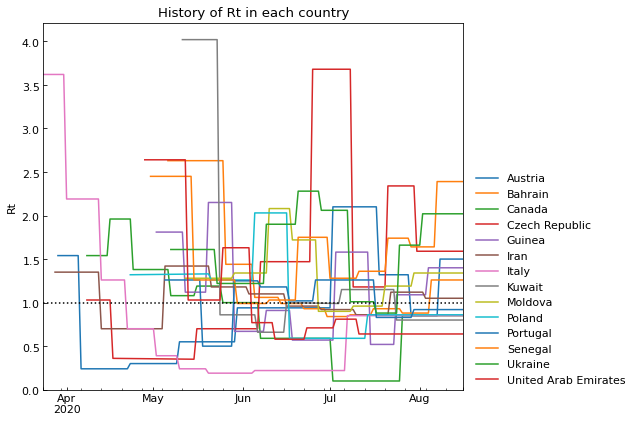

Country,Austria,Bahrain,Canada,Czech Republic,Guinea,Iran,Italy,Kuwait,Moldova,Poland,Portugal,Senegal,Ukraine,United Arab Emirates
Date,,,,,,,,,,,,,,
2020-08-12,1.5,1.26,0.85,1.59,1.4,1.05,0.85,0.8,1.34,0.86,0.92,2.39,2.02,0.64
2020-08-13,1.5,1.26,0.85,1.59,1.4,1.05,0.85,0.8,1.34,0.86,0.92,2.39,2.02,0.64
2020-08-14,1.5,1.26,0.85,1.59,1.4,1.05,0.85,0.8,1.34,0.86,0.92,2.39,2.02,0.64
2020-08-15,1.5,1.26,0.85,1.59,1.4,1.05,0.85,0.8,1.34,0.86,0.92,2.39,2.02,0.64
2020-08-16,1.5,1.26,0.85,1.59,1.4,1.05,0.85,0.8,1.34,0.86,0.92,2.39,2.02,0.64


In [14]:
analyser.param_history("Rt", roll_window=None).tail()

### $\rho$: Effective contact rate $\mathrm{[-]}$

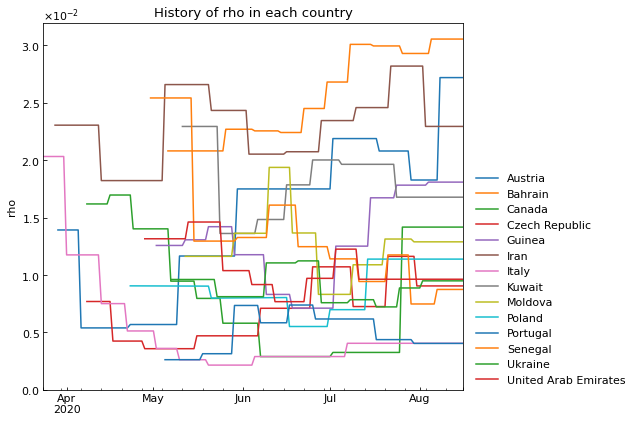

Country,Austria,Bahrain,Canada,Czech Republic,Guinea,Iran,Italy,Kuwait,Moldova,Poland,Portugal,Senegal,Ukraine,United Arab Emirates
Date,,,,,,,,,,,,,,
2020-08-12,0.0272,0.030559,0.014172,0.009044,0.018092,0.022945,0.004045,0.016778,0.012886,0.011382,0.004035,0.008737,0.009487,0.009628
2020-08-13,0.0272,0.030559,0.014172,0.009044,0.018092,0.022945,0.004045,0.016778,0.012886,0.011382,0.004035,0.008737,0.009487,0.009628
2020-08-14,0.0272,0.030559,0.014172,0.009044,0.018092,0.022945,0.004045,0.016778,0.012886,0.011382,0.004035,0.008737,0.009487,0.009628
2020-08-15,0.0272,0.030559,0.014172,0.009044,0.018092,0.022945,0.004045,0.016778,0.012886,0.011382,0.004035,0.008737,0.009487,0.009628
2020-08-16,0.0272,0.030559,0.014172,0.009044,0.018092,0.022945,0.004045,0.016778,0.012886,0.011382,0.004035,0.008737,0.009487,0.009628


In [15]:
analyser.param_history("rho", roll_window=None).tail()

### $\sigma$: Recovery rate $\mathrm{[-]}$

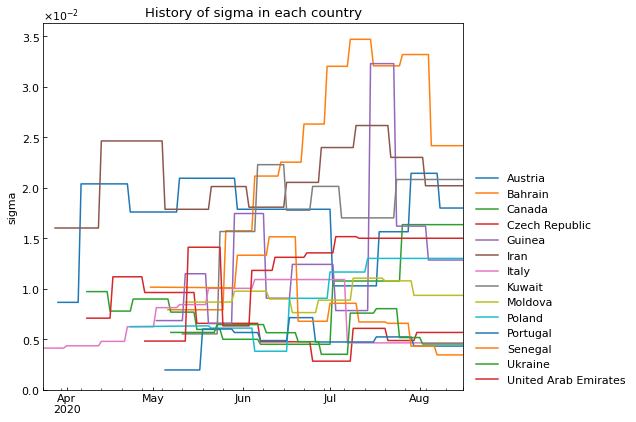

Country,Austria,Bahrain,Canada,Czech Republic,Guinea,Iran,Italy,Kuwait,Moldova,Poland,Portugal,Senegal,Ukraine,United Arab Emirates
Date,,,,,,,,,,,,,,
2020-08-12,0.017978,0.024147,0.016335,0.005665,0.012832,0.020183,0.004636,0.020802,0.009337,0.012993,0.004317,0.003444,0.004524,0.014987
2020-08-13,0.017978,0.024147,0.016335,0.005665,0.012832,0.020183,0.004636,0.020802,0.009337,0.012993,0.004317,0.003444,0.004524,0.014987
2020-08-14,0.017978,0.024147,0.016335,0.005665,0.012832,0.020183,0.004636,0.020802,0.009337,0.012993,0.004317,0.003444,0.004524,0.014987
2020-08-15,0.017978,0.024147,0.016335,0.005665,0.012832,0.020183,0.004636,0.020802,0.009337,0.012993,0.004317,0.003444,0.004524,0.014987
2020-08-16,0.017978,0.024147,0.016335,0.005665,0.012832,0.020183,0.004636,0.020802,0.009337,0.012993,0.004317,0.003444,0.004524,0.014987


In [16]:
analyser.param_history("sigma", roll_window=None).tail()

### $\kappa$: Mortality rate of infected cases $\mathrm{[-]}$

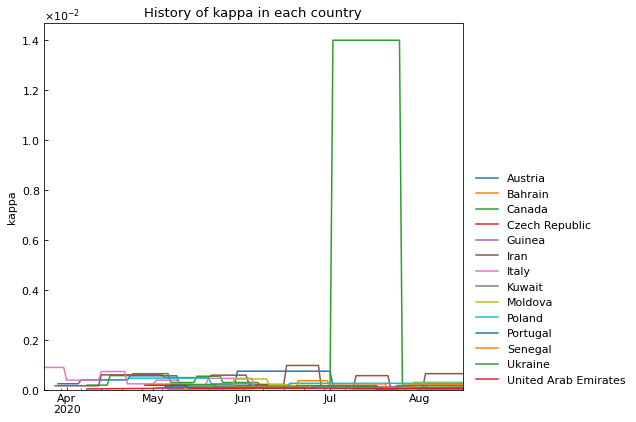

Country,Austria,Bahrain,Canada,Czech Republic,Guinea,Iran,Italy,Kuwait,Moldova,Poland,Portugal,Senegal,Ukraine,United Arab Emirates
Date,,,,,,,,,,,,,,
2020-08-12,0.000059,0.000059,0.000239,0.000037,0.000037,0.000642,0.000045,0.000098,0.000294,0.000256,0.00007,0.000215,0.000157,0.000041
2020-08-13,0.000059,0.000059,0.000239,0.000037,0.000037,0.000642,0.000045,0.000098,0.000294,0.000256,0.00007,0.000215,0.000157,0.000041
2020-08-14,0.000059,0.000059,0.000239,0.000037,0.000037,0.000642,0.000045,0.000098,0.000294,0.000256,0.00007,0.000215,0.000157,0.000041
2020-08-15,0.000059,0.000059,0.000239,0.000037,0.000037,0.000642,0.000045,0.000098,0.000294,0.000256,0.00007,0.000215,0.000157,0.000041
2020-08-16,0.000059,0.000059,0.000239,0.000037,0.000037,0.000642,0.000045,0.000098,0.000294,0.000256,0.00007,0.000215,0.000157,0.000041


In [17]:
analyser.param_history("kappa", roll_window=None).tail()

### $\theta$: Mortality rate of S$^\ast$ cases $\mathrm{[-]}$

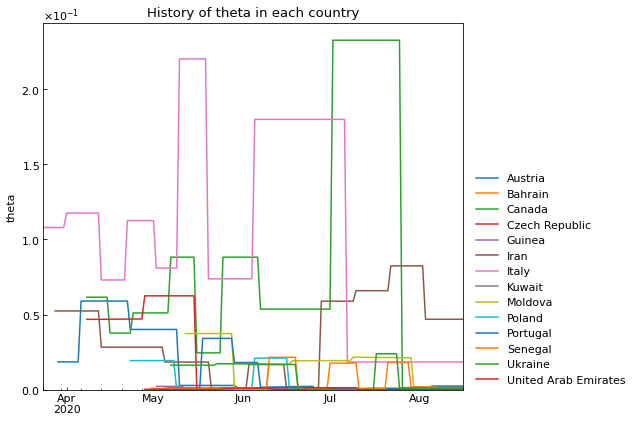

Country,Austria,Bahrain,Canada,Czech Republic,Guinea,Iran,Italy,Kuwait,Moldova,Poland,Portugal,Senegal,Ukraine,United Arab Emirates
Date,,,,,,,,,,,,,,
2020-08-12,0.00257,0.002586,0.001385,0.000665,0.000665,0.046873,0.018436,0.000436,0.000122,0.000953,0.001757,0.001022,0.000808,0.000019
2020-08-13,0.00257,0.002586,0.001385,0.000665,0.000665,0.046873,0.018436,0.000436,0.000122,0.000953,0.001757,0.001022,0.000808,0.000019
2020-08-14,0.00257,0.002586,0.001385,0.000665,0.000665,0.046873,0.018436,0.000436,0.000122,0.000953,0.001757,0.001022,0.000808,0.000019
2020-08-15,0.00257,0.002586,0.001385,0.000665,0.000665,0.046873,0.018436,0.000436,0.000122,0.000953,0.001757,0.001022,0.000808,0.000019
2020-08-16,0.00257,0.002586,0.001385,0.000665,0.000665,0.046873,0.018436,0.000436,0.000122,0.000953,0.001757,0.001022,0.000808,0.000019


In [18]:
analyser.param_history("theta", roll_window=None).tail()

## (Experimental): Relationship of OxCGRT index and parameter values
Government responses will impact on parameter values of ODE models about 14 days later. Here, we will investigate on the relationship of [stringency index (from OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/index_methodology.md) and reproduction number/model parameters.


In [19]:
# Reproduction number
df = analyser.track()
delay = 14
df["Stringency_index_delay"] = df["Stringency_index"].shift(delay)
df = df.dropna(how="any")
df = df.loc[:, ["Stringency_index_delay", "Rt", *cs.SIRF.PARAMETERS]]
df.corr().style.background_gradient(axis=None)

,Stringency_index_delay
Stringency_index_delay,1.000000
